In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import PIL
import tensorflow as tf
import pathlib
from glob import glob

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
data_dir = pathlib.Path(".\\flower_photos")

In [3]:
list(data_dir.glob("*/*.jpg"))

[WindowsPath('flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('flower_photos/daisy/10555749515_13a12a026e.jpg'),
 WindowsPath('flower_photos/daisy/10555815624_dc211569b0.jpg'),
 WindowsPath('flower_photos/daisy

In [4]:
len(list(data_dir.glob("*/*.jpg")))

3670

In [5]:
roses = list(data_dir.glob("roses/*.jpg"))

In [6]:
roses[:5]

[WindowsPath('flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

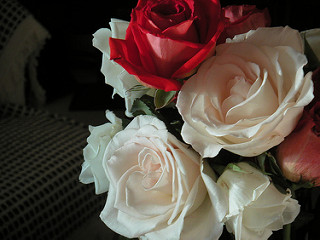

In [7]:
PIL.Image.open(roses[1])

In [8]:
flower_dict = {
    "roses": list(data_dir.glob("roses/*.jpg")),
    "daisy": list(data_dir.glob("daisy/*.jpg")),
    "dandelion": list(data_dir.glob("dandelion/*.jpg")),
    "sunflowers": list(data_dir.glob("sunflower/*.jpg")),
    "tulips": list(data_dir.glob("tulips/*.jpg"))
}

In [9]:
labels = {
    "roses": 0,
    "daisy": 1,
    "dandelion": 2,
    "sunflower": 3,
    "tulips": 4
}

In [10]:
# Data preparation for Deep Learning Training
X, y = [], []

for flower_name, images in flower_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resize_img = cv2.resize(img, (180, 180))
        X.append(resize_img)
        y.append(labels[flower_name])

In [11]:
y[:5]

[0, 0, 0, 0, 0]

In [12]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [13]:
X = np.array(X)
y = np.array(y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [15]:
X_train[0].shape

(180, 180, 3)

In [16]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [17]:
model = Sequential([
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(5, activation="softmax")
])

In [18]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [19]:
model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50


C:\Users\Dhruv Gandhi\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


79/79 [==============================] - 28s 316ms/step - loss: 1.5083 - accuracy: 0.3770
Epoch 2/50
79/79 [==============================] - 23s 290ms/step - loss: 1.0704 - accuracy: 0.5224
Epoch 3/50
79/79 [==============================] - 21s 270ms/step - loss: 0.9764 - accuracy: 0.5949
Epoch 4/50
79/79 [==============================] - 25s 316ms/step - loss: 0.8919 - accuracy: 0.6396
Epoch 5/50
79/79 [==============================] - 33s 414ms/step - loss: 0.8351 - accuracy: 0.6638
Epoch 6/50
79/79 [==============================] - 26s 332ms/step - loss: 0.7471 - accuracy: 0.7156
Epoch 7/50
79/79 [==============================] - 24s 309ms/step - loss: 0.6340 - accuracy: 0.7525
Epoch 8/50
79/79 [==============================] - 24s 302ms/step - loss: 0.5662 - accuracy: 0.7842
Epoch 9/50
79/79 [==============================] - 25s 313ms/step - loss: 0.4890 - accuracy: 0.8198
Epoch 10/50
79/79 [==============================] - 26s 325ms/step - loss: 0.3971 - accuracy: 0.8487


In [20]:
model.evaluate(X_test_scaled, y_test)

14/14 [==============================] - 2s 76ms/step - loss: 2.6171 - accuracy: 0.6502


[2.617081642150879, 0.6502242088317871]

In [21]:
# Data Augmentation

data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

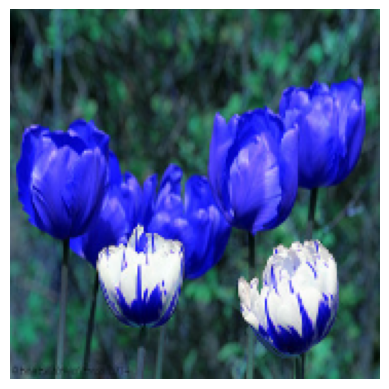

In [22]:
plt.axis("off")
plt.imshow(X[50])

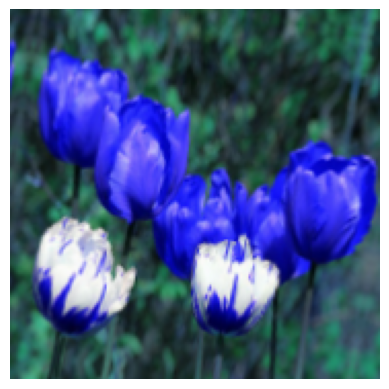

In [23]:
plt.axis("off")
plt.imshow(data_augmentation(X)[50].numpy().astype("uint8"))

In [24]:
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPool2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(5, activation="softmax")
])

In [25]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [26]:
model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
79/79 [==============================] - 31s 331ms/step - loss: 1.4552 - accuracy: 0.3735
Epoch 2/50
79/79 [==============================] - 28s 357ms/step - loss: 1.0828 - accuracy: 0.5097
Epoch 3/50
79/79 [==============================] - 27s 341ms/step - loss: 1.0418 - accuracy: 0.5168
Epoch 4/50
79/79 [==============================] - 26s 326ms/step - loss: 0.9983 - accuracy: 0.5604
Epoch 5/50
79/79 [==============================] - 26s 325ms/step - loss: 0.9594 - accuracy: 0.5909
Epoch 6/50
79/79 [==============================] - 26s 326ms/step - loss: 0.8985 - accuracy: 0.6356
Epoch 7/50
79/79 [==============================] - 26s 325ms/step - loss: 0.8671 - accuracy: 0.6543
Epoch 8/50
79/79 [==============================] - 26s 324ms/step - loss: 0.8462 - accuracy: 0.6626
Epoch 9/50
79/79 [==============================] - 25s 322ms/step - loss: 0.8124 - accuracy: 0.6840
Epoch 10/50
79/79 [==============================] - 25s 321ms/step - loss: 0.7876 - accura

In [27]:
model.evaluate(X_test_scaled, y_test)

14/14 [==============================] - 3s 67ms/step - loss: 0.7326 - accuracy: 0.7735


[0.7325736284255981, 0.773542582988739]